#                           Submission at Dicoding
Klasifikasi Gambar
#                           Data Diri

###                           Nama: Hanadi
###                           Email: hanadiadi45@gmail.com
###                           Lokasi: Mataram, Nusa Tenggara Barat




In [ ]:
!pip install split-folders

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
import zipfile,os,shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
import os
import time
import keras
import random
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate
from keras.models import Sequential
from keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix, classification_report
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
sns.set_style("whitegrid")

impor library

In [ ]:
# 1. Mount Google Drive untuk mengakses file di Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Menentukan path ke file ZIP di Google Drive
local_zip = '/content/drive/MyDrive/Colab/Poryek_submission_2/Faulty_solar_panel.zip'

# 3. Mengekstrak file ZIP ke direktori yang diinginkan (misalnya /tmp)
import zipfile
import os

# Membuka file ZIP
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp/Faulty_solar_panel')

# 4. Menentukan lokasi dataset yang telah diekstrak
dataset = '/tmp/Faulty_solar_panel'

# 5. Mendeteksi kelas-kelas di dalam folder dataset
deteksi_kelas = [nama_kelas for nama_kelas in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, nama_kelas))]

# 6. Menampilkan kelas yang terdeteksi
print(f"Kelas yang terdeteksi: {deteksi_kelas}")


Mounted at /content/drive
Kelas yang terdeteksi: ['Dusty', 'Bird-drop', 'Hot spot', 'Electrical-damage', 'Clean', 'Snow-Covered', 'Physical-Damage']


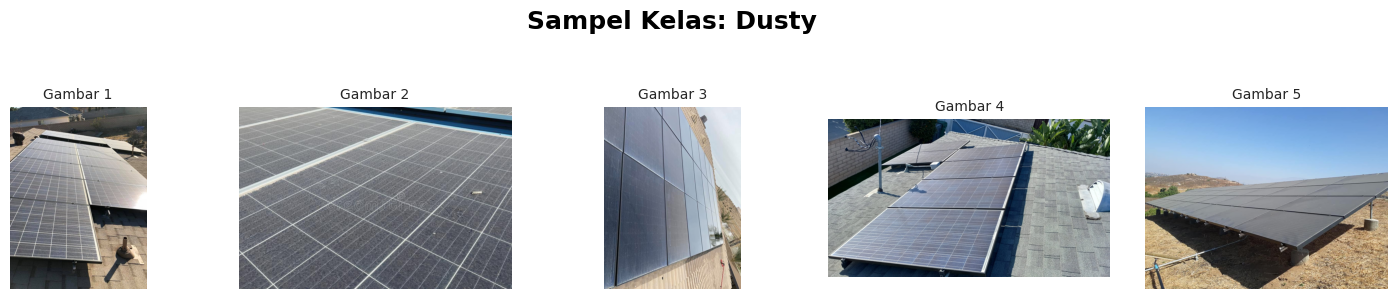

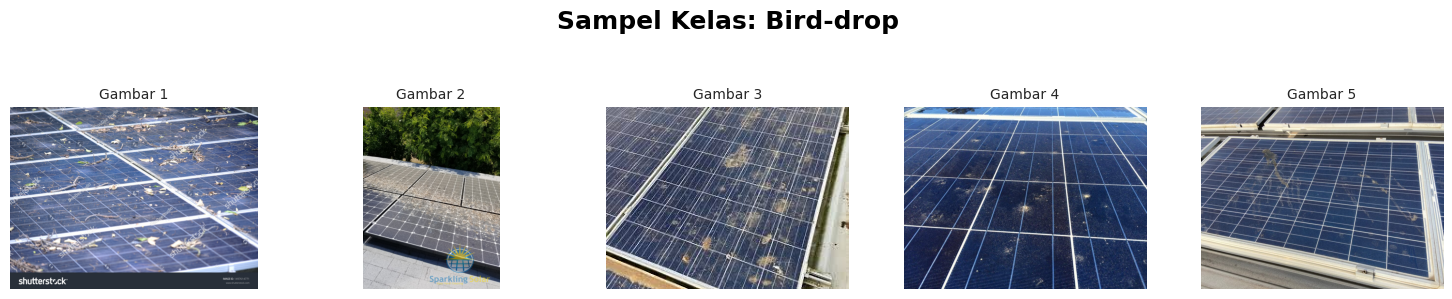

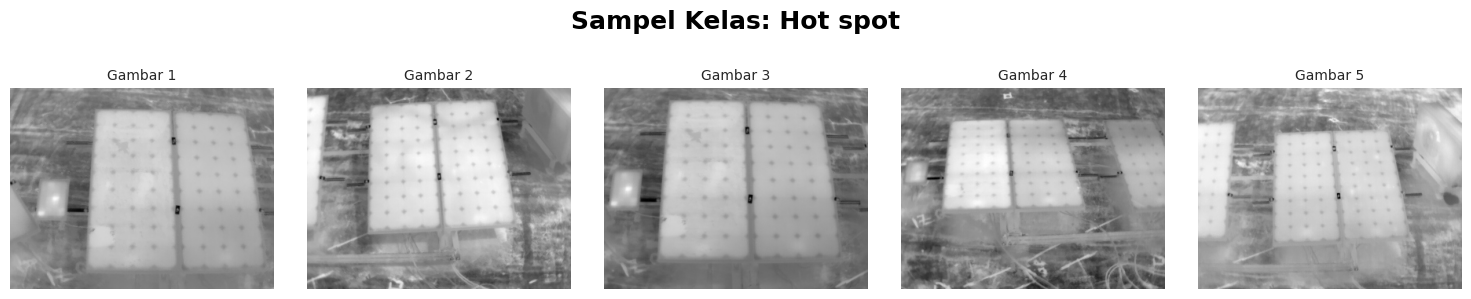

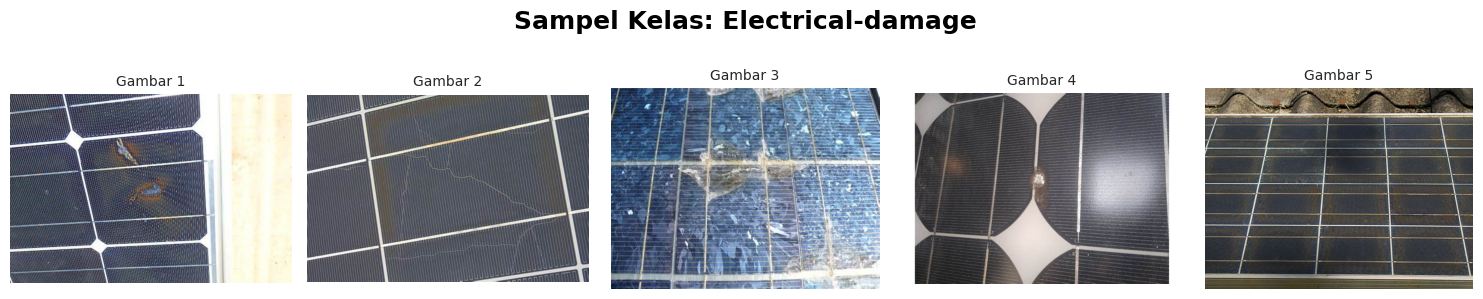

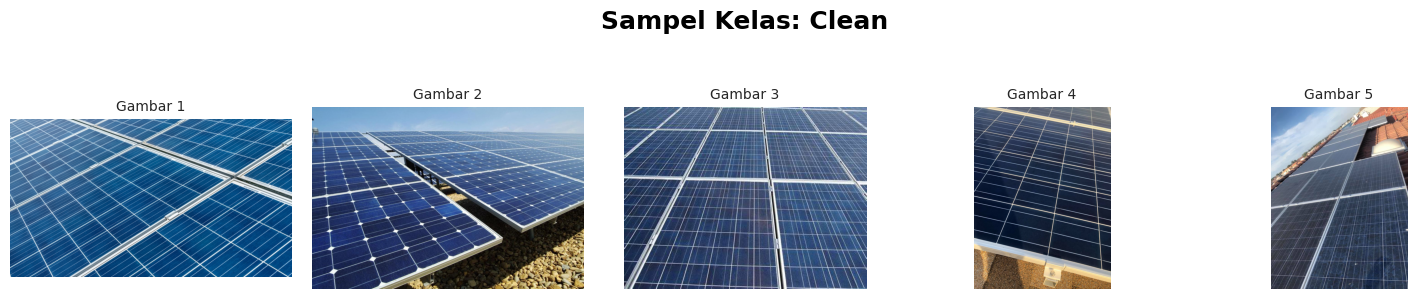

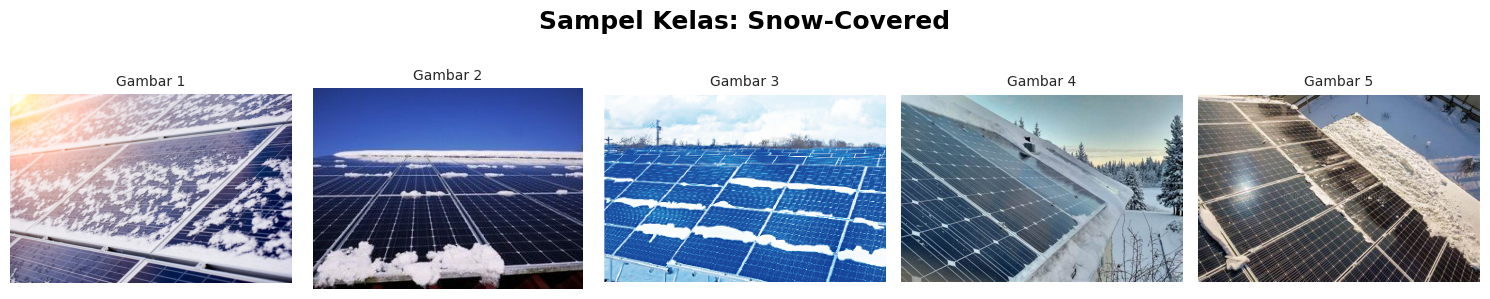

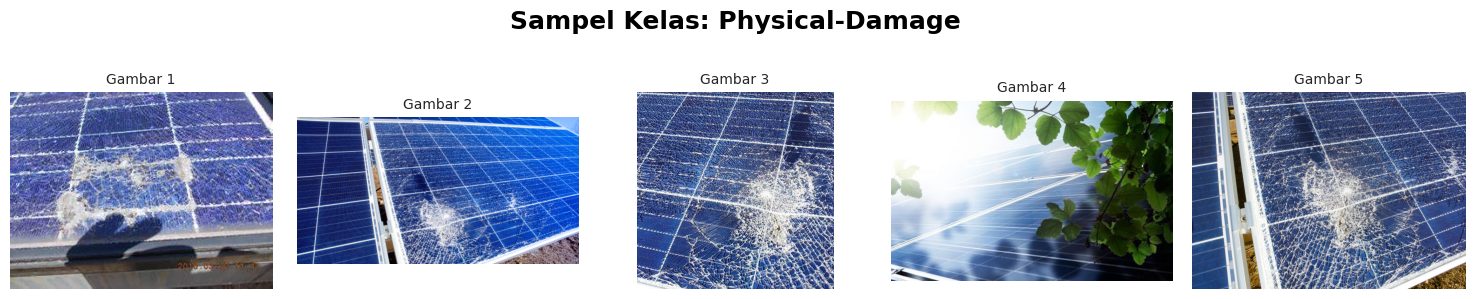

In [ ]:
# menampilkan sampel gambar dari masing-masing kelas
for nama_kelas in deteksi_kelas:
    # Mendefinisikan path dari kelas
    class_path = os.path.join(dataset, nama_kelas)

    # Membuat list gambar berisi 5 gambar acak
    images = os.listdir(class_path)
    random_images = random.choices(images, k=5)

    # Membuat plot berukuran 1x5 dengan judul sesuai kelas dari sampel
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    plt.suptitle(f"Sampel Kelas: {nama_kelas}", fontsize=18, fontweight="bold", color="black")

    for i in range(5):
        # Menampilkan gambar random dari masing-masing kelas
        img_path = os.path.join(class_path, random_images[i])
        img = keras.utils.load_img(img_path)
        ax[i].imshow(img)

        # Menghapus sumbu karena tidak diperlukan
        ax[i].axis("off")

        # Menuliskan judul gambar
        ax[i].set_title(f"Gambar {i + 1}", fontsize=10)

    # Mengatur layout gambar
    plt.tight_layout(rect=[0, 0, 1, 0.9])

    # Menampilkan gambar
    plt.show()


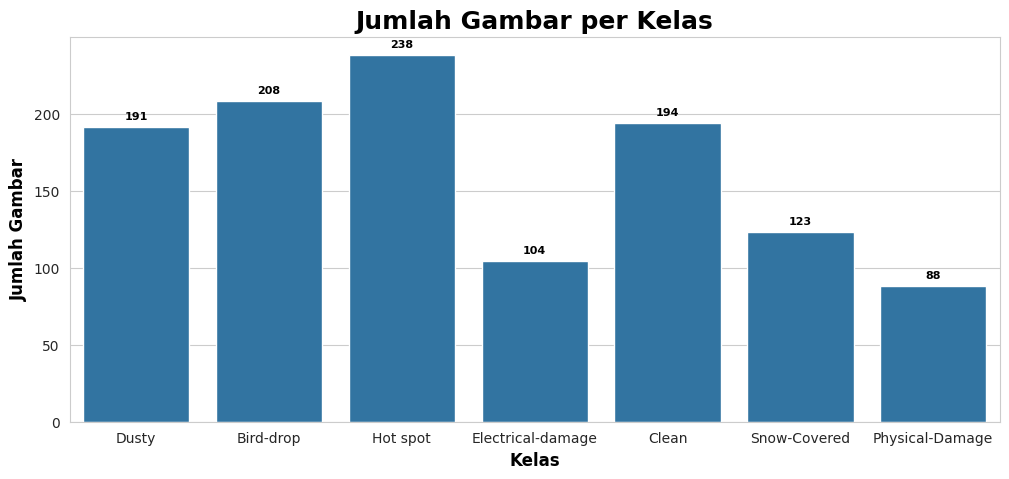

In [ ]:
#  menghitung jumlah gambar masing-masing kelas
counts = []
for nama_kelas in deteksi_kelas:
    class_path = os.path.join(dataset, nama_kelas)
    counts.append(len(os.listdir(class_path)))

# Membentuk barplot vertikal, yaitu kelas sebagai sumbu X dan jumlah sebagai sumbu Y
plt.figure(figsize=(12, 5))
ax = sns.barplot(x=deteksi_kelas, y=counts)

# Memberi anotasi pada setiap bar dengan jumlah gambar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5, "{}".format(counts[i]),
            ha="center", fontsize=8, color="black", fontweight="semibold")

# Memberikan judul pada gambar
plt.title("Jumlah Gambar per Kelas", fontsize=18, fontweight="bold", color="black")

# Memberikan label pada sumbu X
plt.xlabel("Kelas", fontsize=12, fontweight="bold", color="black")

# Memberikan label pada sumbu Y
plt.ylabel("Jumlah Gambar", fontsize=12, fontweight="bold", color="black")

# Menampilkan gambar
plt.show()


In [ ]:
# membuat DataFrame dari seluruh gambar
# Membentuk list kosong
image_data = []

# Membentuk list berisi tuple yang berisi path dari masing-masing gambar beserta kelasnya
for nama_kelas in deteksi_kelas:
    # Membentuk path dari kelas
    class_path = os.path.join(dataset, nama_kelas)

    # Mencatat seluruh file yang ada di tiap kelas
    files = os.listdir(class_path)

    # Perulangan terhadap seluruh file
    for file in files:
        # Membentuk path dari setiap file
        file_path = os.path.join(class_path, file)

        # Menggabungkan path dari setiap file dengan kelas yang bersesuaian
        image_data.append((file_path, nama_kelas))

# Mengubah list menjadi DataFrame berisi path dan kelasnya
df = pd.DataFrame(image_data, columns = ["path", "label"])

# Mengacak baris pada DataFrame untuk meningkatkan keacakan data
df = df.sample(frac = 1).reset_index(drop = True)

# Menampilkan 5 baris teratas dari DataFrame
df.head()

path      label
0  /tmp/Faulty_solar_panel/Bird-drop/Bird (172).jpg  Bird-drop
1      /tmp/Faulty_solar_panel/Dusty/Dust (139).jpg      Dusty
2  /tmp/Faulty_solar_panel/Bird-drop/Bird (117).jpg  Bird-drop
3  /tmp/Faulty_solar_panel/Bird-drop/Bird (135).jpg  Bird-drop
4     /tmp/Faulty_solar_panel/Hot spot/DJI_0377.jpg   Hot spot

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Menghitung jumlah sampel
jumlah_sampel = len(df)
print(f"Jumlah sampel: {jumlah_sampel}")

# Pisahkan data menjadi training dan testing set dengan proporsi 80/20
data_training, data_testing = train_test_split(df, test_size=0.2, random_state=42)

# Reset index
data_training.reset_index(inplace=True, drop=True)
data_testing.reset_index(inplace=True, drop=True)

print(f"Jumlah sampel pada data training: {len(data_training)}")
print(f"Jumlah sampel pada data testing: {len(data_testing)}")

# Gunakan ImageDataGenerator untuk normalisasi gambar
data_generator = ImageDataGenerator(rescale=1.0/255)

# Fungsi untuk membuat data generator
def create_data_generator(dataframe, is_training=False):
    return data_generator.flow_from_dataframe(
        dataframe,
        x_col="path",
        y_col="label",
        target_size=(224, 224),
        batch_size=16,
        class_mode="categorical",
        shuffle=is_training
    )

# Membuat data generator untuk training dan testing
train_generator = create_data_generator(data_training, is_training=True)
test_generator = create_data_generator(data_testing, is_training=False)

# Menampilkan jumlah sampel
print(f"Jumlah sampel pada data training: {len(train_generator.filenames)}")
print(f"Jumlah sampel pada data testing: {len(test_generator.filenames)}")


Jumlah sampel: 1146
Jumlah sampel pada data training: 916
Jumlah sampel pada data testing: 230
Found 912 validated image filenames belonging to 7 classes.
Found 229 validated image filenames belonging to 7 classes.
Jumlah sampel pada data training: 912
Jumlah sampel pada data testing: 229


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 4 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
from keras.applications import DenseNet121
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers
from keras.callbacks import Callback
import tensorflow as tf

# Load the DenseNet121 model without the top layers (include_top=False)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in base_model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Create a new Sequential model and add the DenseNet base model
model = Sequential()

# Add the DenseNet121 base model
model.add(base_model)

# Add custom layers on top of DenseNet121
model.add(Conv2D(256, (3, 3), activation="relu", padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# GlobalAveragePooling layer to flatten the data
model.add(GlobalAveragePooling2D())

# Fully connected layers
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

# Output layer for 7 classes (use softmax for multi-class classification)
model.add(Dense(7, activation="softmax"))

# Compile the model with optimizer SGD
model.compile(
    loss="categorical_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
    metrics=["accuracy"]
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define a callback to stop training when accuracy reaches 97%
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}
        if (logs.get("accuracy") > 0.97) and (logs.get("val_accuracy") > 0.97):
            print("\nModel selesai dilatih karena akurasi telah lebih dari 97%!")
            self.model.stop_training = True

# Instantiate the callback
callbacks = MyCallback()

In [ ]:
# Train the model using data generators
history = model.fit(
    train_generator,                # Replace with your actual data generator
    epochs=18,
    validation_data=test_generator,  # Replace with validation data generator
    callbacks=[callbacks]
)

Epoch 1/22


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 250s 4s/step - accuracy: 0.4127 - loss: 1.6417 - val_accuracy: 0.6550 - val_loss: 0.8913
Epoch 2/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.6529 - loss: 0.9047 - val_accuracy: 0.7467 - val_loss: 0.6835
Epoch 3/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.7206 - loss: 0.7245 - val_accuracy: 0.7904 - val_loss: 0.6667
Epoch 4/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.8071 - loss: 0.5519 - val_accuracy: 0.7773 - val_loss: 0.6486
Epoch 5/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 276s 4s/step - accuracy: 0.8140 - loss: 0.5090 - val_accuracy: 0.8079 - val_loss: 0.7333
Epoch 6/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 266s 4s/step - accuracy: 0.8336 - loss: 0.4537 - val_accuracy: 0.8079 - val_loss: 0.6289
Epoch 7/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 298s 5s/step - accuracy: 0.9053 - loss: 0.2841 - val_accuracy: 0.8166 - val_loss: 0.5948
Epoch 8/22
57/57 ━━━━━━━━━━━━━━━━━━━━ 227s 4s/step - accuracy: 0.8997 - loss: 0.3068 - val_accuracy: 0.8646 - val_loss: 0.

In [ ]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 7, 7, 1024)          │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 7, 7, 256)           │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,154,448 (46.37 MB)

 Trainable params: 2,558,215 (9.76 MB)

 Non-trainable params: 7,038,016 (26.85 MB)

 Optimizer params: 2,558,217 (9.76 MB)

15/15 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - accuracy: 0.8628 - loss: 0.8153
Validation Accuracy: 86.03%


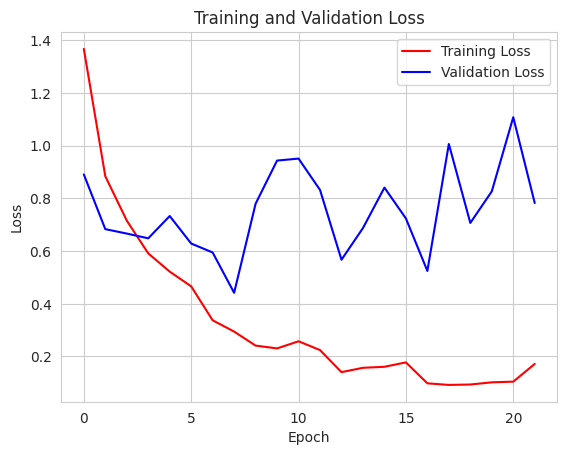

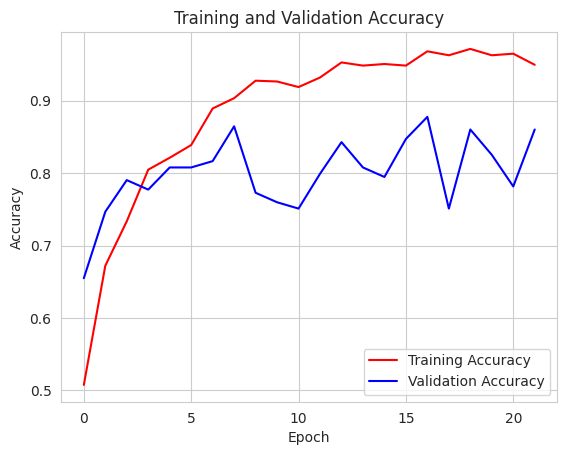

In [ ]:
evaluation = model.evaluate(test_generator)
print(f"Validation Accuracy: {evaluation[1] * 100:.2f}%")


plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Simpan model ke Google Drive dalam format .h5
model_path_h5 = '/content/drive/MyDrive/Colab/proyek_akhir_2.h5'
model.save(model_path_h5)
print(f"Model disimpan sebagai .h5 di: {model_path_h5}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model disimpan sebagai .h5 di: /content/drive/MyDrive/Colab/proyek_akhir_2.h5


In [ ]:
import tensorflow as tf

# Menyimpan model dalam format SavedModel
model.save("path/to/saved_model", save_format="tf")

In [ ]:
# Step 3: Simpan model ke Google Drive dalam format SavedModel
saved_model_path = '/content/drive/MyDrive/Colab/saved_model'
model.save(saved_model_path, save_format="tf")
print(f"Model disimpan dalam format SavedModel di: {saved_model_path}")

In [ ]:



# Step 4: Konversi model ke format TensorFlow.js (TFJS) dan simpan di Google Drive
!pip install tensorflowjs

# Set the path to save the converted TensorFlow.js model
tfjs_output_path = '/content/drive/MyDrive/Colab/tfjs_model'
!tensorflowjs_converter --input_format keras {model_path_h5} {tfjs_output_path}
print(f"Model disimpan dalam format TensorFlow.js di: {tfjs_output_path}")

# Step 5: Konversi model ke format TensorFlow Lite (TFLite) dan simpan di Google Drive
import tensorflow as tf

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Set the path to save the TFLite model
tflite_output_path = '/content/drive/MyDrive/Colab/model.tflite'
with open(tflite_output_path, 'wb') as f:
    f.write(tflite_model)
print(f"Model disimpan dalam format TFLite di: {tflite_output_path}")

# Step 6: Simpan file requirements ke Google Drive
!pip freeze > /content/drive/MyDrive/Colab/requirements_proyek_submission_2.txt
print("File requirements disimpan di: /content/drive/MyDrive/Colab/requirements_proyek_submission_2.txt")


In [ ]:

# Menyimpan model dalam format SavedModel
export_dir = "saved_model/"
tf.saved_model.save(model, export_dir)

In [ ]:
# Convert model menjadi model.tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("model.tflite")
tflite_model_file.write_bytes(tflite_model)

In [ ]:
# Install tensorflowjs
!pip install tensorflowjs

In [ ]:
model.save("proyek_akhir_2.h5")

# Konversi model.h5 ke tfjs_model
!tensorflowjs_converter --input_format keras \
    --weight_shard_size_bytes 4294967296 \
    model.h5 tfjs_model

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Simpan model ke Google Drive dalam format .h5
model_path_h5 = '/content/drive/MyDrive/Colab/proyek_akhir_2.h5'
model.save(model_path_h5)

# Step 3: Konversi model.h5 ke format tfjs_model dan simpan di Google Drive
!pip install tensorflowjs

# Set the path to save the converted TensorFlow.js model
tfjs_output_path = '/content/drive/MyDrive/Colab/tfjs_model'

# Convert the model to TensorFlow.js format
!tensorflowjs_converter --input_format keras \
    --weight_shard_size_bytes 4294967296 \
    {model_path_h5} {tfjs_output_path}

# Step 4: Simpan file requirements ke Google Drive
!pip freeze > /content/drive/MyDrive/Colab/requirements_proyek_submission_2.txt


In [ ]:
pip freeze requirements.txt

In [ ]:
!pip freeze > /content/drive/MyDrive/Colab/requirements_proyek_submission_2.txt

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Install tensorflowjs
!pip install tensorflowjs

# Step 2: Simpan model dalam format SavedModel ke Google Drive
import tensorflow as tf

export_dir = '/content/drive/MyDrive/Colab/saved_model'  # Path di Google Drive
tf.saved_model.save(model, export_dir)
print(f"Model disimpan dalam format SavedModel di: {export_dir}")

# Step 3: Konversi model ke format TFLite dan simpan di Google Drive
import pathlib

# Konversi model ke format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Set path untuk menyimpan model TFLite di Google Drive
tflite_output_path = '/content/drive/MyDrive/Colab/model.tflite'
with open(tflite_output_path, 'wb') as f:
    f.write(tflite_model)
print(f"Model disimpan dalam format TFLite di: {tflite_output_path}")

# Step 4: Simpan model dalam format .h5 di Google Drive
model_path_h5 = '/content/drive/MyDrive/Colab/proyek_akhir_2.h5'
model.save(model_path_h5)
print(f"Model disimpan sebagai .h5 di: {model_path_h5}")

# Step 5: Konversi model .h5 ke format TensorFlow.js (TFJS) dan simpan di Google Drive
tfjs_output_path = '/content/drive/MyDrive/Colab/tfjs_model'
!tensorflowjs_converter --input_format keras {model_path_h5} {tfjs_output_path}
print(f"Model disimpan dalam format TensorFlow.js di: {tfjs_output_path}")

# Step 6: Simpan file requirements ke Google Drive
requirements_path = '/content/drive/MyDrive/Colab/requirements_proyek_submission_2.txt'
!pip freeze > {requirements_path}
print(f"File requirements disimpan di: {requirements_path}")
